In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
from imblearn.over_sampling import SMOTE
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/credit-risk-dataset/credit_risk_dataset.csv')
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


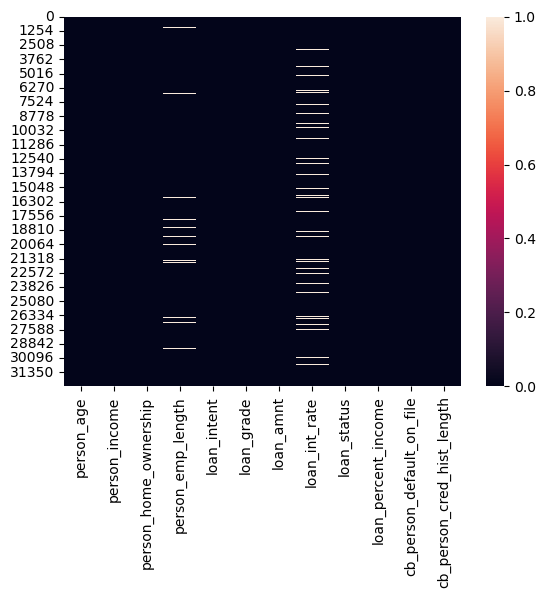

In [5]:
sns.heatmap(df.isnull());

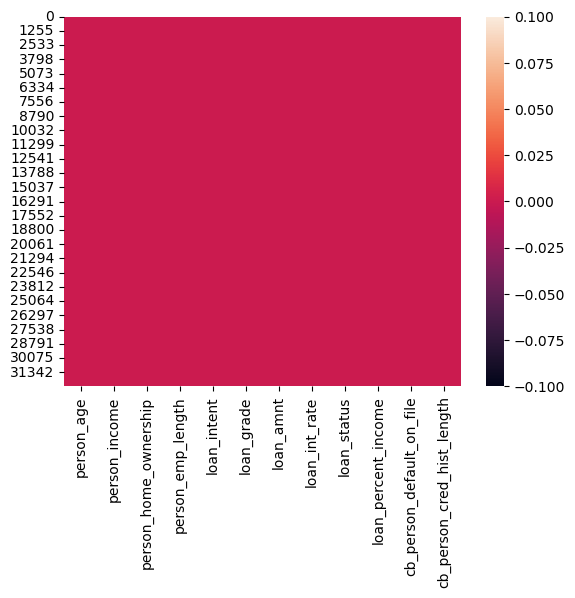

In [6]:
df = df.dropna()
sns.heatmap(df.isnull());

<AxesSubplot:>

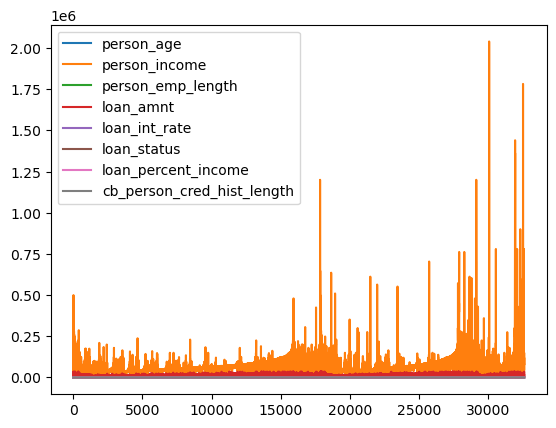

In [7]:
df = df[df['person_age']<80 ]
df = df[df['person_emp_length']<100 ]
df.plot()

In [8]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [9]:
catcols=['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']
target=['loan_status']
numcols=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

In [10]:
df = pd.get_dummies(df)

<AxesSubplot:>

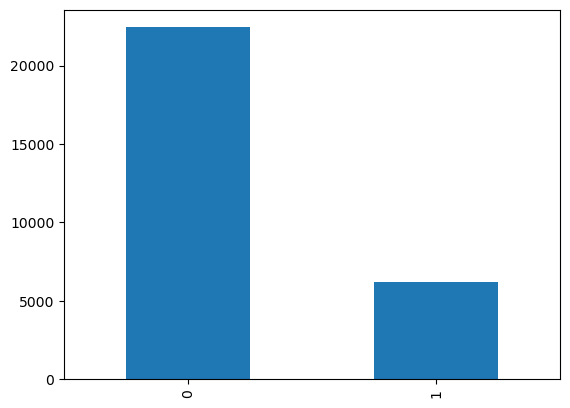

In [11]:
df.loan_status.value_counts().plot(kind='bar')

In [12]:
from imblearn.over_sampling import SMOTE
X_no_sm,y_no_sm = df.loc[:,~df.columns.isin(['target'])], df[target]
sm = SMOTE(sampling_strategy=0.1)
X_sm, y_sm = SMOTE().fit_resample(df.loc[:,~df.columns.isin(['target'])], df[target])

<AxesSubplot:>

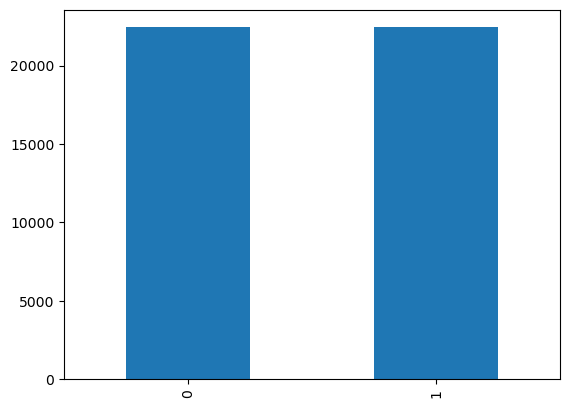

In [13]:
X_sm.loan_status.value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>],
       [<AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_percent_income'}>],
       [<AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

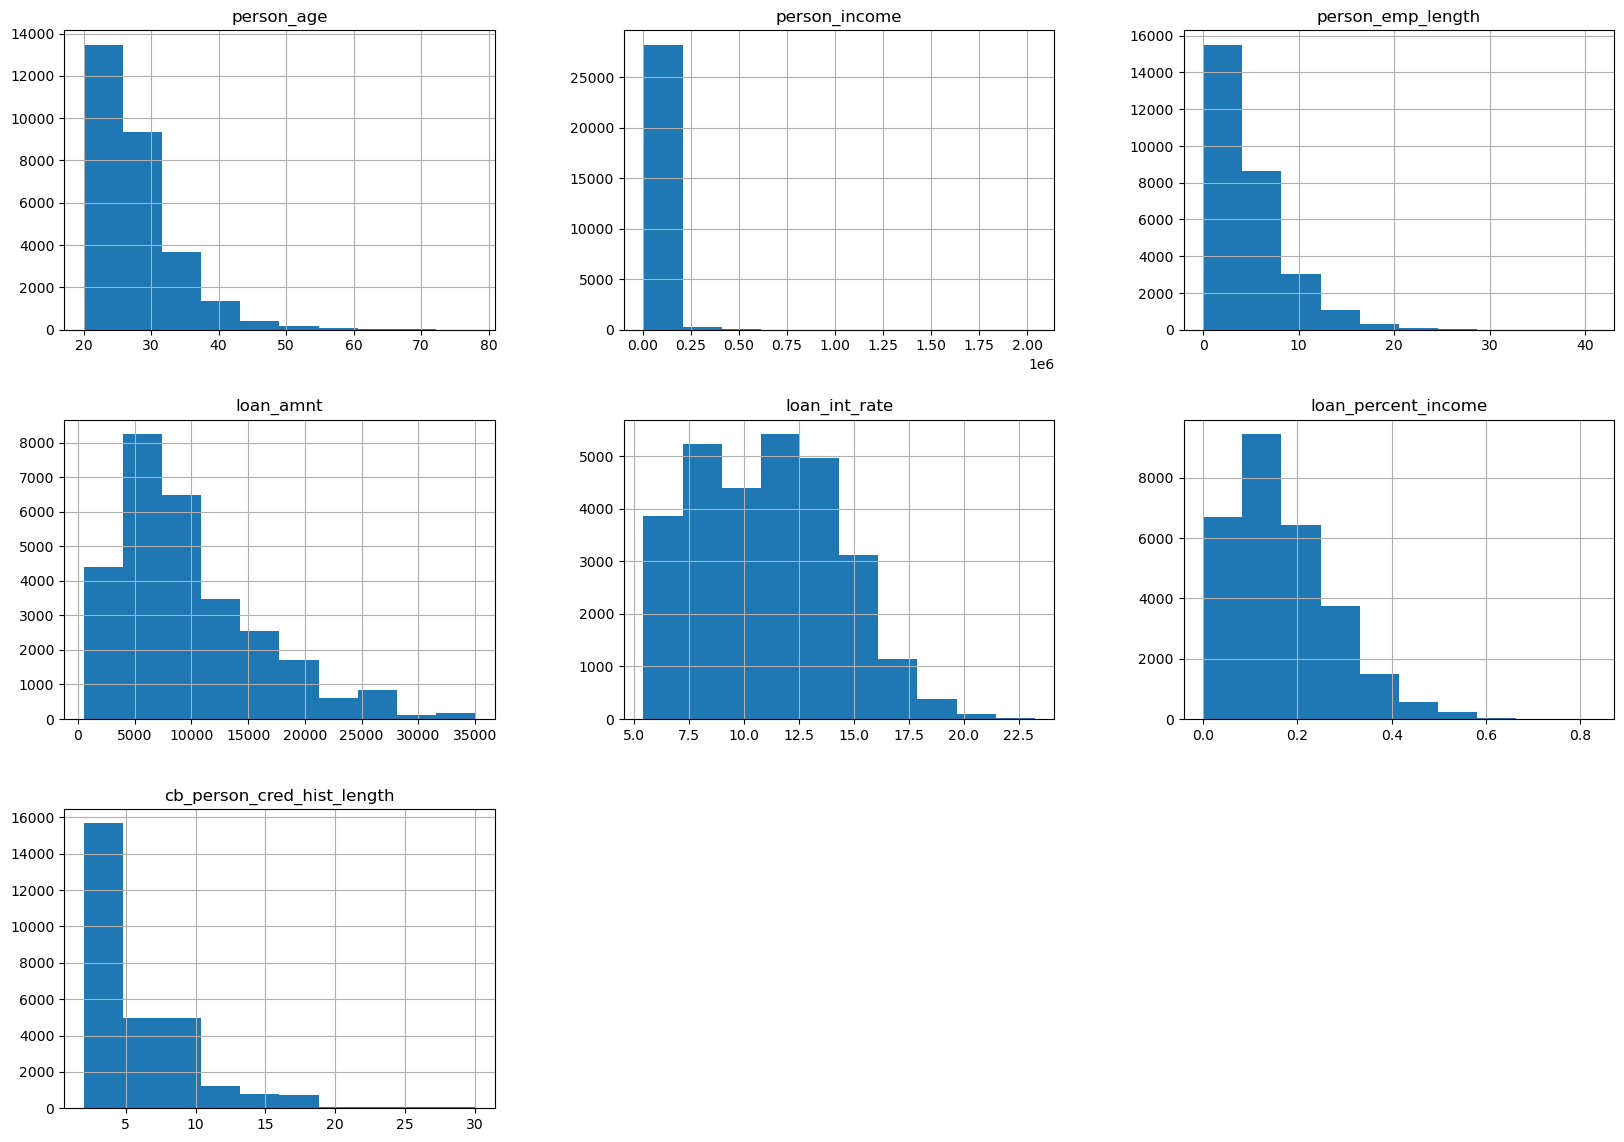

In [14]:
df.loc[:,df.columns.isin(numcols)].hist(figsize=(20,14))

In [15]:
skewed_features=numcols
log_numerical_features=[]
for f in skewed_features:
    X_sm[f + '_log']=np.log1p(X_sm[f])
    log_numerical_features.append(f + '_log')

array([[<AxesSubplot:title={'center':'person_age'}>,
        <AxesSubplot:title={'center':'person_income'}>,
        <AxesSubplot:title={'center':'person_emp_length'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'loan_int_rate'}>,
        <AxesSubplot:title={'center':'loan_status'}>],
       [<AxesSubplot:title={'center':'loan_percent_income'}>,
        <AxesSubplot:title={'center':'cb_person_cred_hist_length'}>,
        <AxesSubplot:title={'center':'person_home_ownership_MORTGAGE'}>,
        <AxesSubplot:title={'center':'person_home_ownership_OTHER'}>,
        <AxesSubplot:title={'center':'person_home_ownership_OWN'}>,
        <AxesSubplot:title={'center':'person_home_ownership_RENT'}>],
       [<AxesSubplot:title={'center':'loan_intent_DEBTCONSOLIDATION'}>,
        <AxesSubplot:title={'center':'loan_intent_EDUCATION'}>,
        <AxesSubplot:title={'center':'loan_intent_HOMEIMPROVEMENT'}>,
        <AxesSubplot:title={'center':'loan_intent_

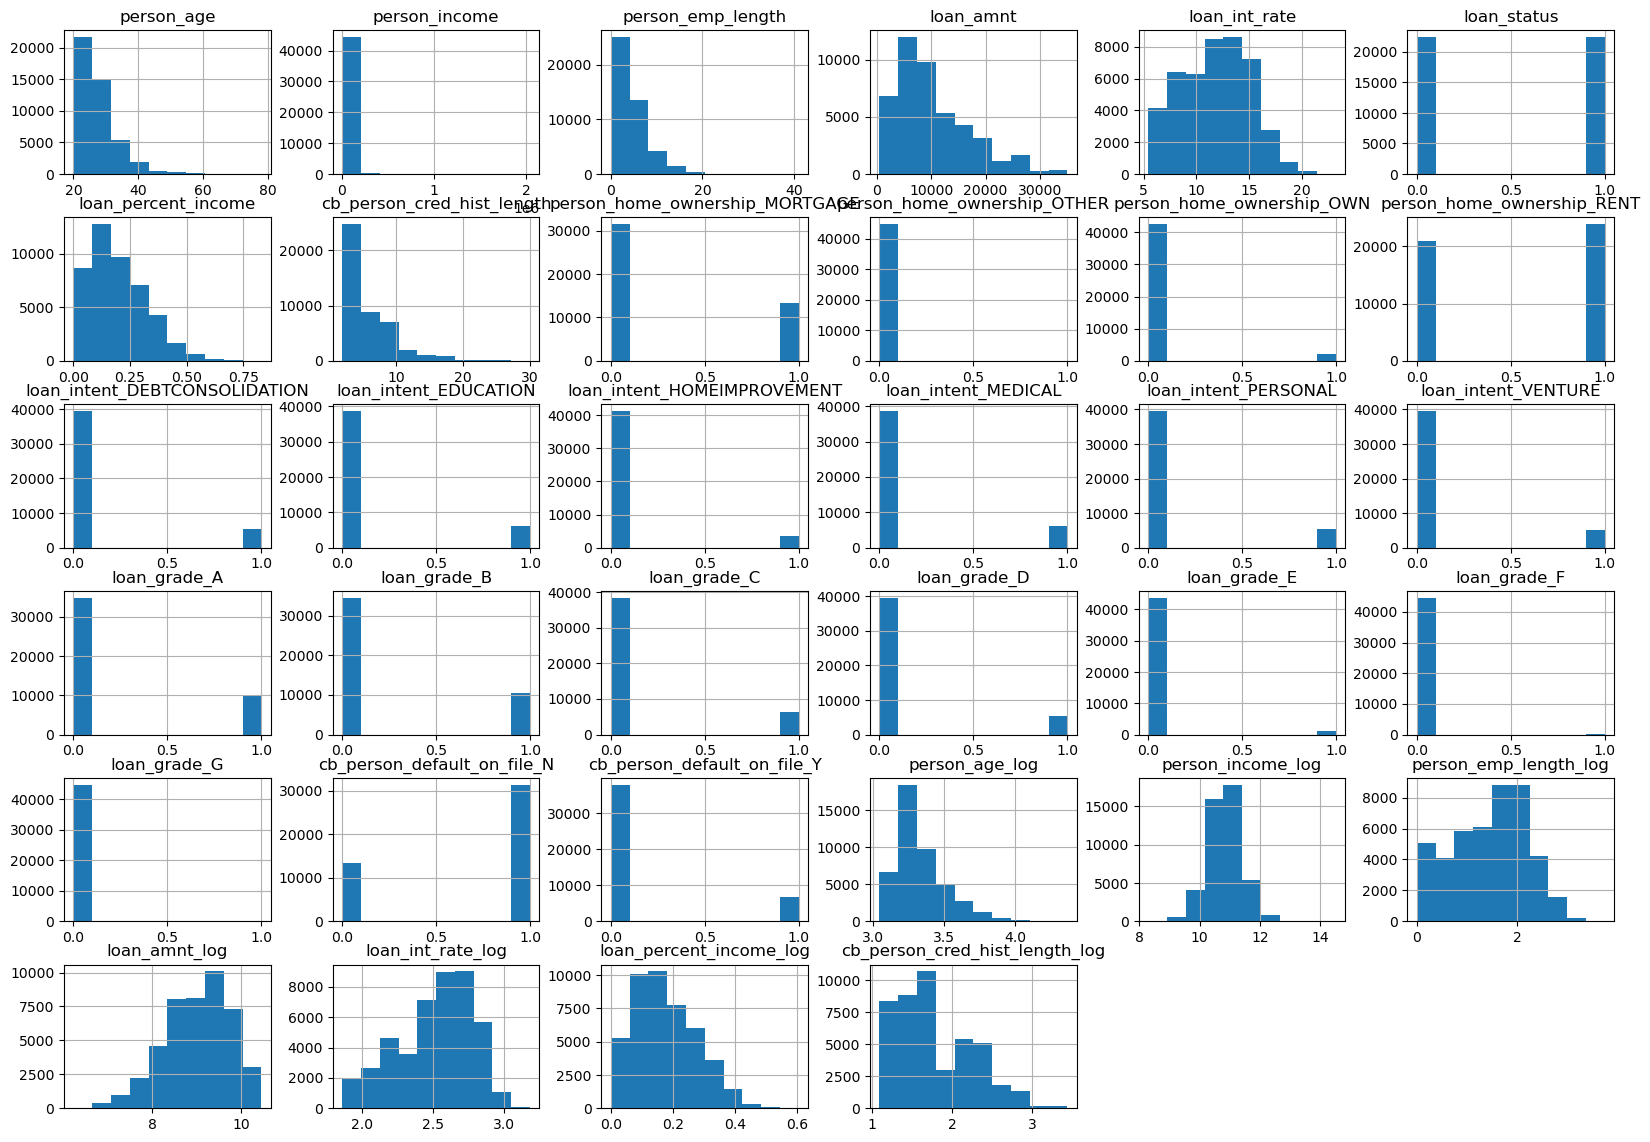

In [16]:
X_sm.hist(figsize=(20,14))

In [17]:
X_sm.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y',
       'person_age_log', 'person_income_log', 'person_emp_length_log',
       'loan_amnt_log', 'loan_int_rate_log', 'loan_percent_income_log',
       'cb_person_cred_hist_length_log'],
      dtype='object')

In [18]:
temp=list()
for i in numcols:
    temp.append(i+'_log')   
numcols+=temp

In [19]:
numcols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_age_log',
 'person_income_log',
 'person_emp_length_log',
 'loan_amnt_log',
 'loan_int_rate_log',
 'loan_percent_income_log',
 'cb_person_cred_hist_length_log']

<AxesSubplot:>

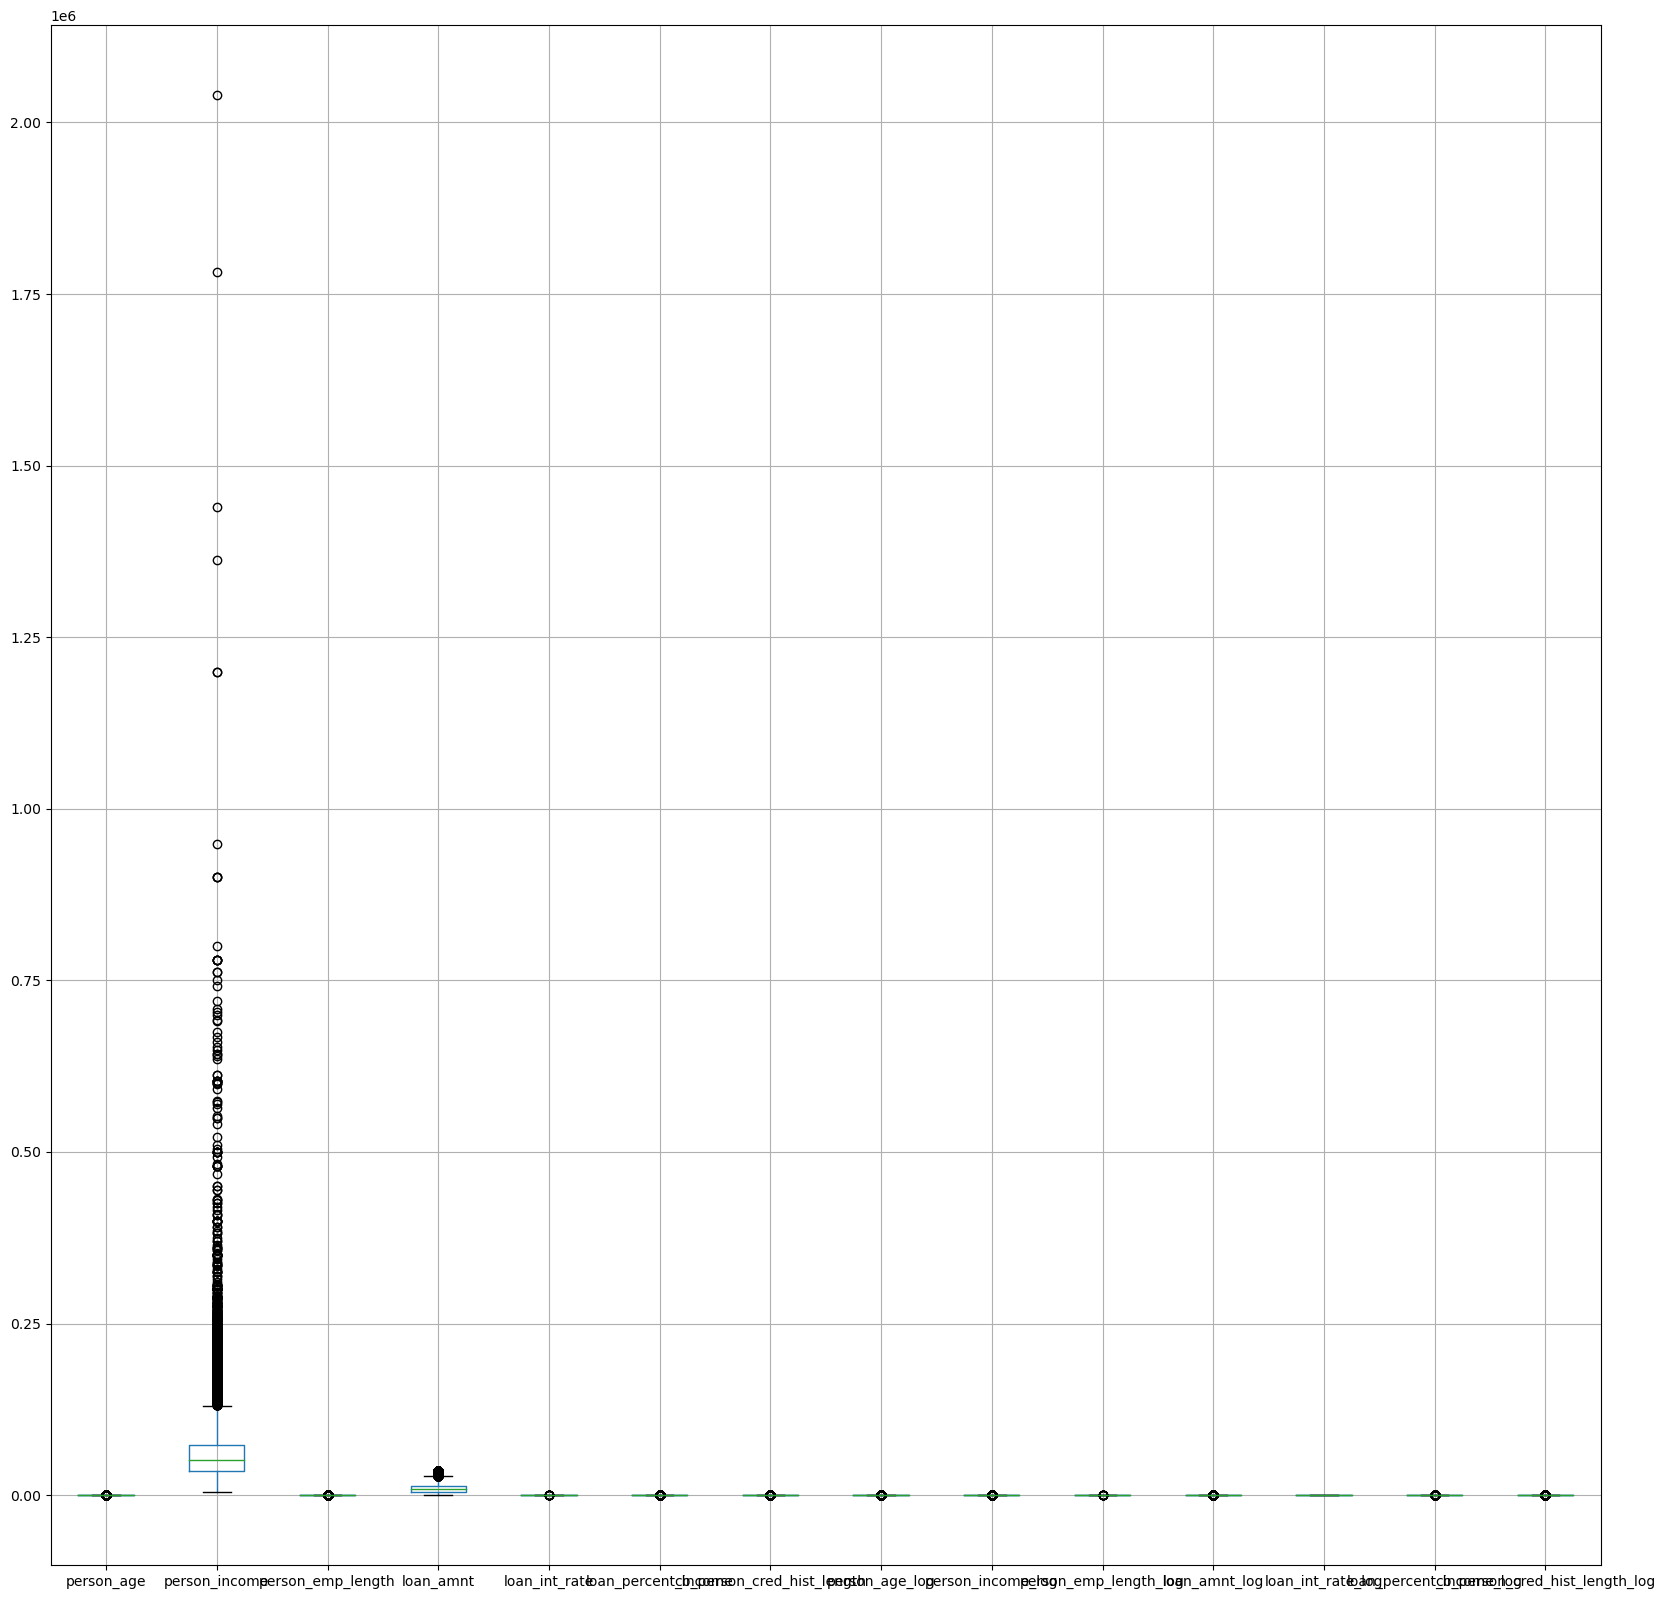

In [20]:
X_sm.loc[:,X_sm.columns.isin(numcols)].boxplot(figsize=(20,20))

In [21]:
from sklearn.preprocessing import StandardScaler
for e in X_sm.columns:
  if e  in numcols:
    X_sm[e] = StandardScaler().fit_transform(np.array(X_sm[e]).reshape(-1,1))
X_sm

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y,person_age_log,person_income_log,person_emp_length_log,loan_amnt_log,loan_int_rate_log,loan_percent_income_log,cb_person_cred_hist_length_log
0,-1.098943,-1.071606,0.124624,-1.369550,-0.201628,0,-0.796481,-0.934718,0,0,...,0,1,0,-1.309311,-2.855691,0.442173,-2.882263,-0.065528,-0.805751,-1.277434
1,-0.412249,-1.071606,-0.931747,-0.695876,0.334510,1,3.060325,-0.671954,1,0,...,0,1,0,-0.388940,-2.855691,-1.027306,-0.525477,0.428841,2.796082,-0.707869
2,-0.755596,0.104122,-0.139469,3.720432,1.065889,1,2.732086,-0.934718,0,0,...,0,1,0,-0.829929,0.441168,0.198304,2.033962,1.011939,2.534799,-1.277434
3,-0.583922,-0.129341,0.916903,3.720432,0.768379,1,2.896205,-0.409190,0,0,...,0,0,1,-0.605024,0.122362,0.984514,2.033962,0.785684,2.666283,-0.266081
4,-1.098943,-1.065296,-0.667655,-1.144992,-1.441254,1,0.434414,-0.934718,0,0,...,0,1,0,-1.309311,-2.802864,-0.484965,-1.615728,-1.548813,0.488457,-1.277434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44851,-0.240575,-0.032548,-0.931747,-0.339727,1.174328,1,-0.517630,-0.146425,0,0,...,0,0,1,-0.181013,0.261787,-1.027306,-0.028377,1.091092,-0.497726,0.094887
44852,-0.583922,-0.663572,-0.931747,-0.920434,-0.567318,1,-0.468242,-0.671954,0,0,...,0,1,0,-0.605024,-0.957681,-1.027306,-0.965851,-0.444975,-0.444135,-0.707869
44853,-0.412249,-0.564150,-1.195840,0.726325,0.307243,1,2.049424,-0.146425,0,0,...,0,0,0,-0.388940,-0.698427,-1.954444,0.862078,0.405226,1.968784,0.094887
44854,-0.927270,-0.799106,-0.767063,-0.467874,-0.359583,1,0.926772,-0.671954,0,0,...,0,1,0,-1.064408,-1.389121,-0.664294,-0.187432,-0.224689,0.963115,-0.707869


<AxesSubplot:>

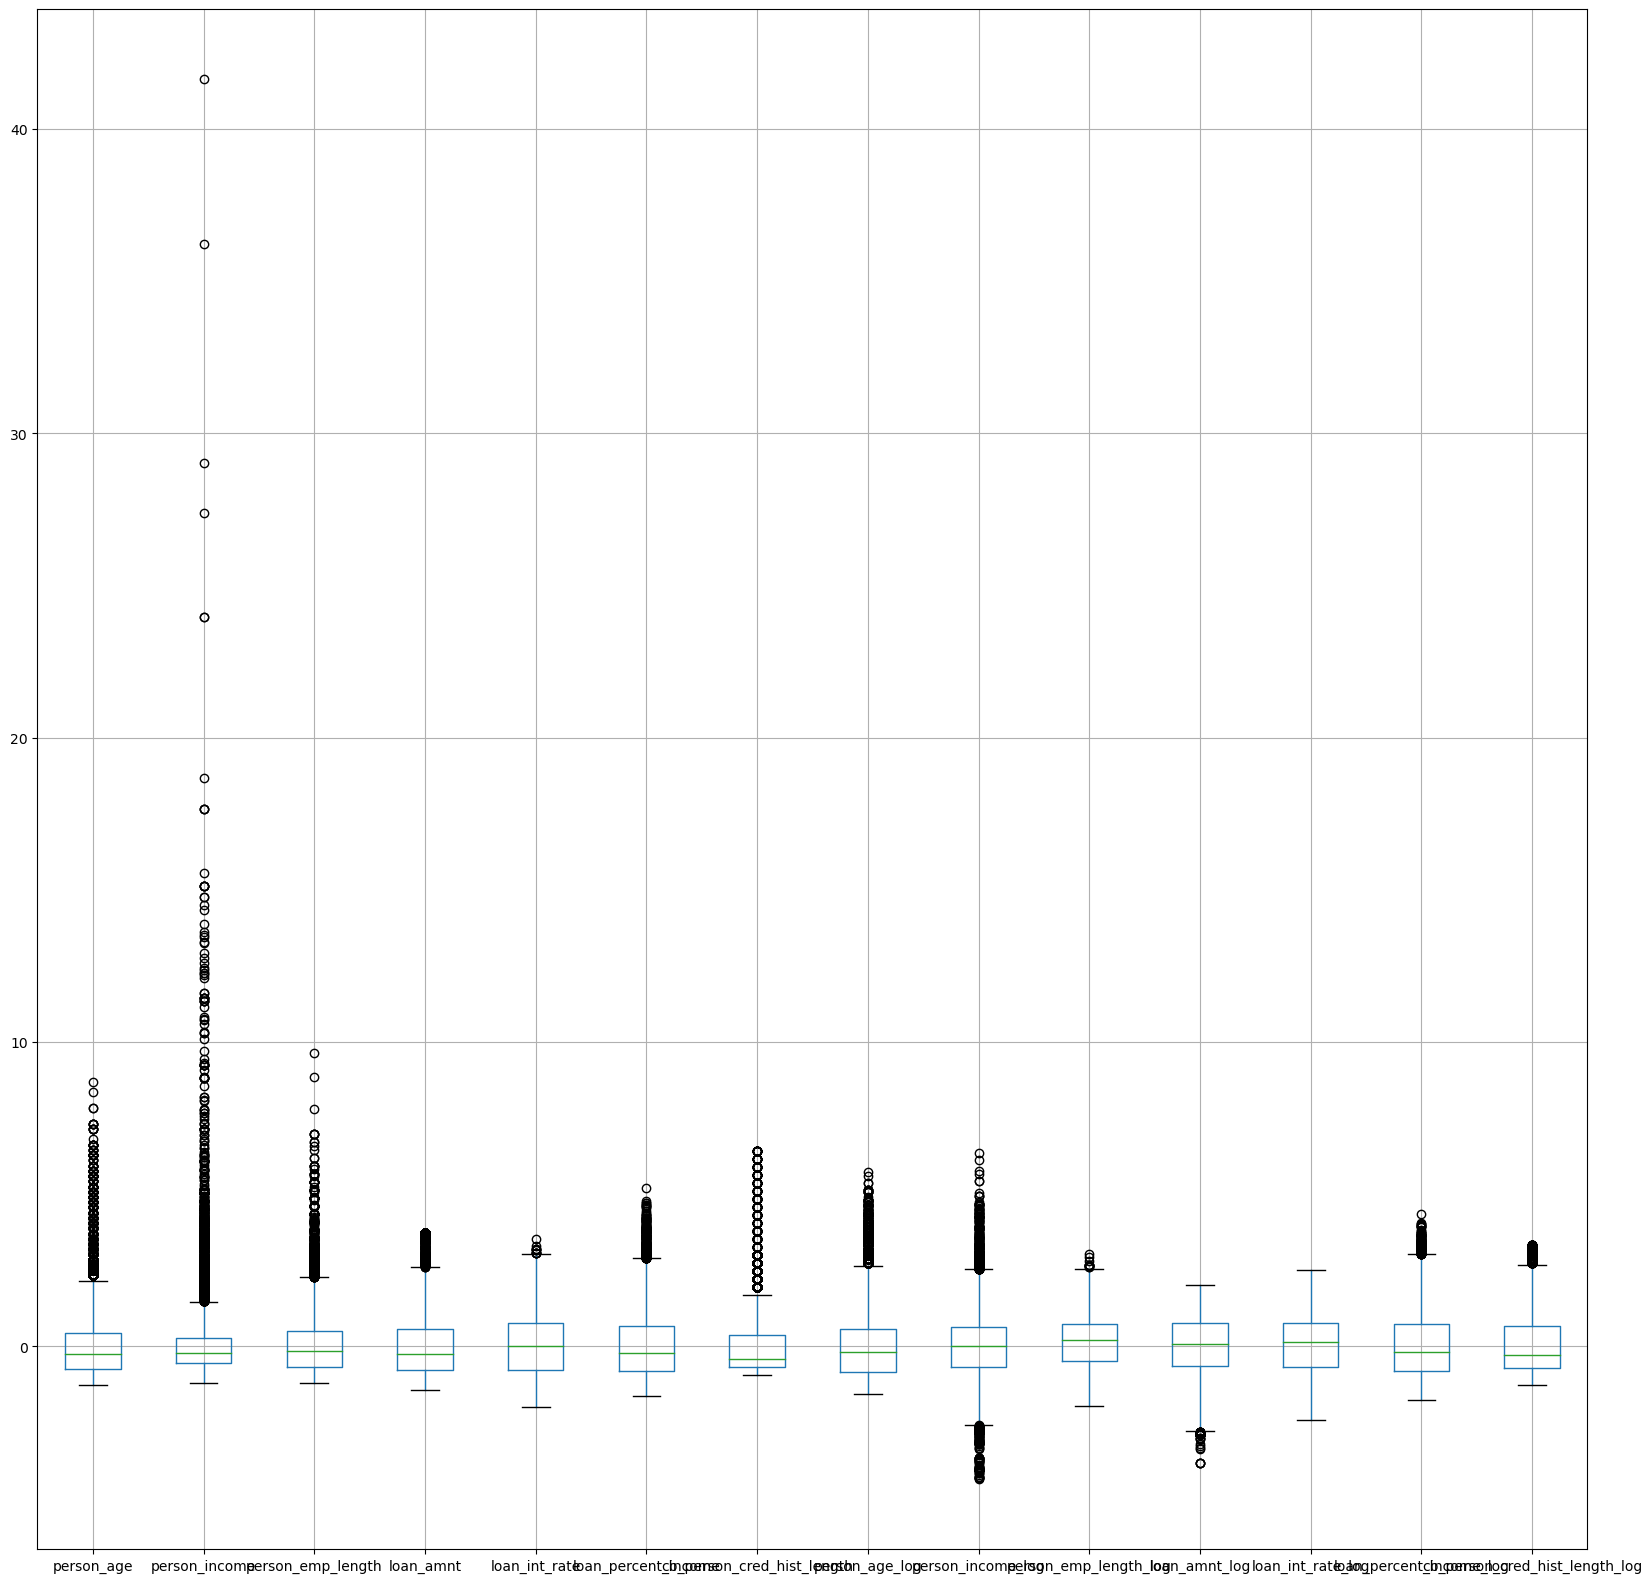

In [22]:
X_sm.loc[:,X_sm.columns.isin(numcols)].boxplot(figsize=(20,20))

In [23]:
import numpy as np
for e in X_sm.columns:
  if e in numcols:
    Q3 = np.quantile(X_sm[e], 0.75)
    Q1 = np.quantile(X_sm[e], 0.25)
    IQR = Q3 - Q1
    print(IQR)
    X_sm = X_sm[(X_sm[e]<(Q3 + 1.5*IQR)) & (X_sm[e]>(Q1 - 1.5*IQR))]

1.201715410489188
0.820275420638964
1.0717294760242346
1.218601476303551
1.4782505905835404
1.4770746694427017
1.051056838327229
1.0426135447849507
1.2081817376667288
1.2164861275234369
1.30705867010613
1.4050509641108093
1.4426963969971416
1.1079499508445734


<AxesSubplot:>

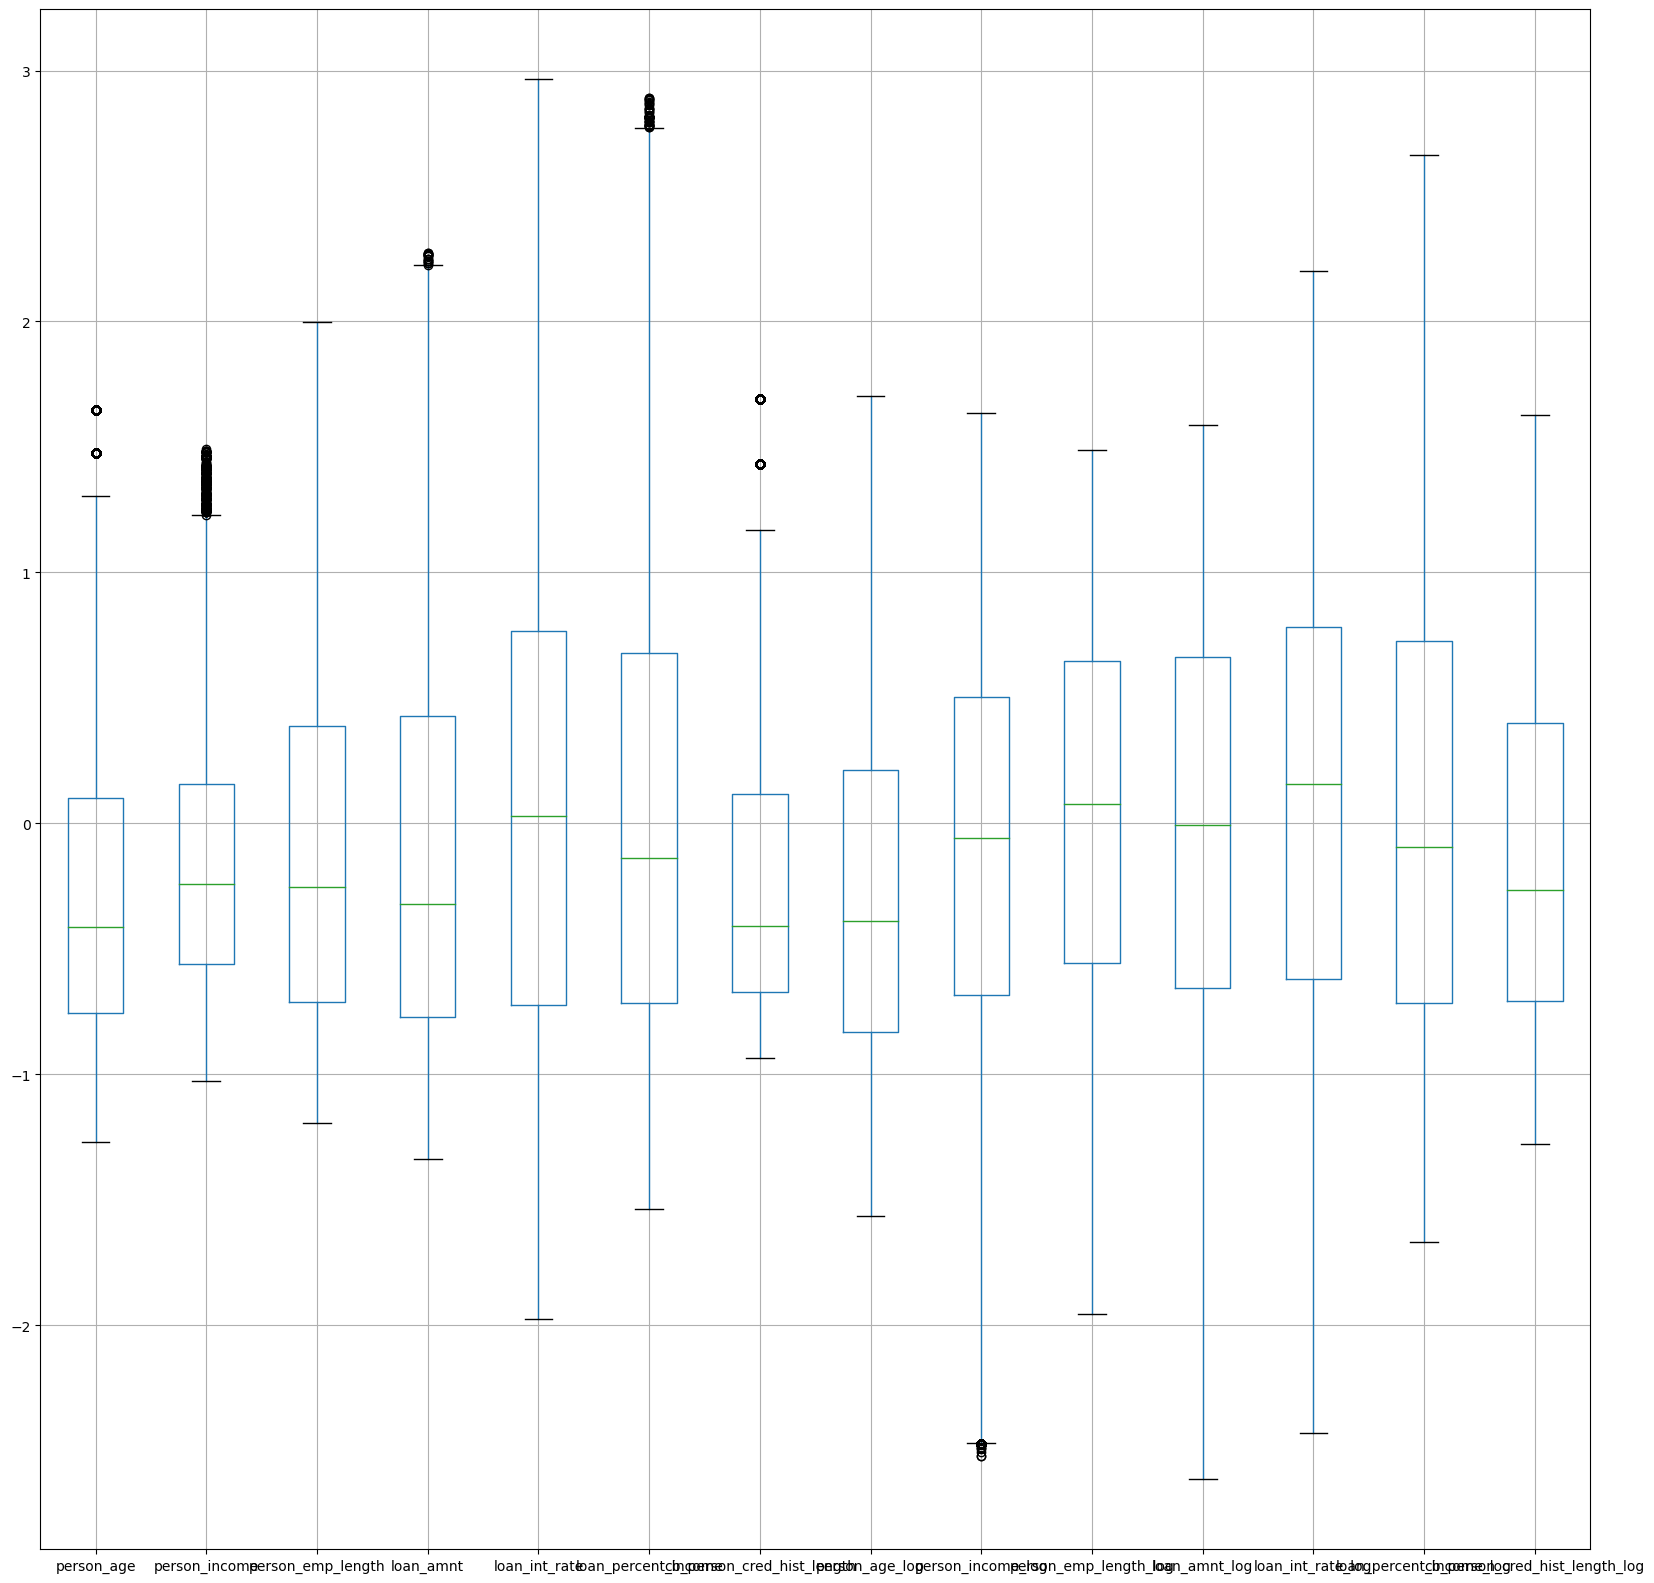

In [24]:
X_sm.loc[:,X_sm.columns.isin(numcols)].boxplot(figsize=(20,20))

In [42]:
X_sm.corr()['loan_status'].sort_values(ascending = False)

loan_status                       1.000000
loan_int_rate                     0.409352
loan_int_rate_log                 0.405991
loan_percent_income               0.397488
loan_percent_income_log           0.394433
loan_grade_D                      0.183453
person_home_ownership_RENT        0.164389
loan_amnt                         0.141959
loan_amnt_log                     0.112538
loan_grade_E                      0.063873
loan_grade_G                      0.034235
loan_grade_F                      0.029288
cb_person_default_on_file_Y       0.025603
person_home_ownership_OTHER      -0.019923
person_age_log                   -0.020875
person_age                       -0.021515
cb_person_cred_hist_length_log   -0.026473
cb_person_cred_hist_length       -0.030697
person_emp_length_log            -0.070134
loan_intent_HOMEIMPROVEMENT      -0.088144
loan_intent_DEBTCONSOLIDATION    -0.092547
person_emp_length                -0.101635
loan_intent_MEDICAL              -0.103206
loan_intent

In [73]:
list(filter(lambda x: 'log'  in x, numcols))
#[ i for i in numcols if i not in list(filter(lambda x: 'log' in x, numcols)) ]

['person_age_log',
 'person_income_log',
 'person_emp_length_log',
 'loan_amnt_log',
 'loan_int_rate_log',
 'loan_percent_income_log',
 'cb_person_cred_hist_length_log']

In [78]:
X_sm = X_sm.loc[:,~X_sm.columns.isin(list(filter(lambda x: 'log'  in x, numcols)))]

In [79]:
X_sm.corr()['loan_status'].sort_values(ascending = False)

loan_status                       1.000000
loan_int_rate                     0.409352
loan_percent_income               0.397488
loan_grade_D                      0.183453
person_home_ownership_RENT        0.164389
loan_amnt                         0.141959
loan_grade_E                      0.063873
loan_grade_G                      0.034235
loan_grade_F                      0.029288
cb_person_default_on_file_Y       0.025603
person_home_ownership_OTHER      -0.019923
person_age                       -0.021515
cb_person_cred_hist_length       -0.030697
loan_intent_HOMEIMPROVEMENT      -0.088144
loan_intent_DEBTCONSOLIDATION    -0.092547
person_emp_length                -0.101635
loan_intent_MEDICAL              -0.103206
loan_intent_PERSONAL             -0.169763
loan_grade_C                     -0.170202
person_home_ownership_OWN        -0.184667
loan_intent_VENTURE              -0.227698
loan_intent_EDUCATION            -0.229054
loan_grade_B                     -0.268716
person_inco

In [83]:
X_sm['neg_loan_grade_A'] = -1*X_sm['loan_grade_A']
X_sm['neg_loan_grade_C'] = -1*X_sm['loan_grade_C']
X_sm['neg_person_home_ownership_OWN'] = -1*X_sm['person_home_ownership_OWN']
X_sm['neg_loan_intent_VENTURE'] = -1*X_sm['loan_intent_VENTURE']
X_sm['neg_loan_intent_EDUCATION'] = -1*X_sm['loan_intent_EDUCATION']
X_sm['neg_loan_grade_B'] = -1*X_sm['loan_grade_B']
X_sm['neg_person_income'] = -1*X_sm['person_income']
X_sm['neg_cb_person_default_on_file_N'] = -1*X_sm['cb_person_default_on_file_N']
X_sm['neg_person_home_ownership_MORTGAGE'] = -1*X_sm['person_home_ownership_MORTGAGE']

In [89]:
fs1 = X_sm.corr()['loan_status'].sort_values(ascending = False)[:20]
fs1

loan_status                           1.000000
loan_int_rate                         0.409352
loan_percent_income                   0.397488
neg_loan_grade_A                      0.381457
neg_person_home_ownership_MORTGAGE    0.352653
neg_cb_person_default_on_file_N       0.342987
neg_person_income                     0.314484
neg_loan_grade_B                      0.268716
neg_loan_intent_EDUCATION             0.229054
neg_loan_intent_VENTURE               0.227698
neg_person_home_ownership_OWN         0.184667
loan_grade_D                          0.183453
neg_loan_grade_C                      0.170202
person_home_ownership_RENT            0.164389
loan_amnt                             0.141959
loan_grade_E                          0.063873
loan_grade_G                          0.034235
loan_grade_F                          0.029288
cb_person_default_on_file_Y           0.025603
person_home_ownership_OTHER          -0.019923
Name: loan_status, dtype: float64

In [98]:
X_sm_fs1 = X_sm.loc[:,X_sm.columns.isin(fs1.index)]
X_sm_fs1

,loan_amnt,loan_int_rate,loan_status,loan_percent_income,person_home_ownership_OTHER,person_home_ownership_RENT,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,neg_loan_grade_A,neg_loan_grade_C,neg_person_home_ownership_OWN,neg_loan_intent_VENTURE,neg_loan_intent_EDUCATION,neg_loan_grade_B,neg_person_income,neg_cb_person_default_on_file_N,neg_person_home_ownership_MORTGAGE
34,-1.144992,-1.326588,1,0.106175,0,0,0,0,0,0,0,-1,0,-1,0,-1,0,1.021128,-1,0
39,-1.144992,0.278727,1,0.106175,0,0,0,0,0,0,0,0,0,-1,-1,0,-1,1.021128,-1,0
59,-1.294697,0.945026,0,-0.550302,0,0,1,0,0,0,1,0,0,0,0,-1,0,1.021128,0,-1
64,-1.070139,0.563841,1,0.434414,0,0,0,0,0,0,1,0,-1,-1,0,-1,0,1.021128,0,0
67,-0.606052,-1.326588,1,2.567967,0,0,0,0,0,0,0,-1,0,-1,0,-1,0,1.021128,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44851,-0.339727,1.174328,1,-0.517630,0,1,1,0,0,0,1,0,0,0,0,0,0,0.032548,0,0
44852,-0.920434,-0.567318,1,-0.468242,0,1,0,0,0,0,0,0,0,0,0,0,-1,0.663572,-1,0
44853,0.726325,0.307243,1,2.049424,0,1,0,0,0,0,0,0,0,0,0,0,0,0.564150,0,0
44854,-0.467874,-0.359583,1,0.926772,0,0,0,0,0,0,0,0,0,0,0,0,-1,0.799106,-1,0


In [99]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_pf = pd.DataFrame(data=poly.fit_transform(X_sm_fs1), columns=poly.get_feature_names(X_sm_fs1.columns))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [127]:
list(filter(lambda x: 'loan_status' not in x, list(X_pf.corr()['loan_status'].sort_values(ascending = False).head(50).index)))
#list(X_pf.corr()['loan_status'].sort_values(ascending = False).head(50).index)[idx]
top_corr_poly = dict()
for i in list(filter(lambda x: 'loan_status' not in x, list(X_pf.corr()['loan_status'].sort_values(ascending = False).head(50).index))):
    top_corr_poly[i] = X_pf.corr()['loan_status'][i]
top_corr_poly

{'loan_int_rate': 0.40935191992893427,
 'loan_percent_income': 0.3974880536941407,
 'neg_loan_grade_A': 0.3814565376640979,
 'loan_percent_income person_home_ownership_RENT': 0.38116037002059344,
 'neg_person_home_ownership_MORTGAGE': 0.35265335620202265,
 'neg_cb_person_default_on_file_N': 0.34298659724230923,
 'neg_person_income': 0.31448420312701486,
 'person_home_ownership_RENT neg_person_income': 0.2993838038122672,
 'neg_loan_grade_B': 0.2687159089560561,
 'loan_int_rate person_home_ownership_RENT': 0.26194007953203,
 'loan_percent_income^2': 0.2508101682231305,
 'neg_loan_intent_EDUCATION': 0.22905415172929186,
 'neg_loan_intent_VENTURE': 0.2276981677177453,
 'neg_person_home_ownership_OWN': 0.18466736650149143,
 'loan_grade_D^2': 0.18345318591885076,
 'loan_grade_D': 0.18345318591885076,
 'person_home_ownership_RENT loan_grade_D': 0.18187217079330842,
 'person_home_ownership_RENT neg_loan_grade_A': 0.1803702885130363,
 'loan_int_rate loan_grade_D': 0.17378764582007447,
 'neg_lo

In [149]:
{k:v for (k,v) in top_corr_poly.items() if v>0.15}

{'loan_int_rate': 0.40935191992893427,
 'loan_percent_income': 0.3974880536941407,
 'neg_loan_grade_A': 0.3814565376640979,
 'loan_percent_income person_home_ownership_RENT': 0.38116037002059344,
 'neg_person_home_ownership_MORTGAGE': 0.35265335620202265,
 'neg_cb_person_default_on_file_N': 0.34298659724230923,
 'neg_person_income': 0.31448420312701486,
 'person_home_ownership_RENT neg_person_income': 0.2993838038122672,
 'neg_loan_grade_B': 0.2687159089560561,
 'loan_int_rate person_home_ownership_RENT': 0.26194007953203,
 'loan_percent_income^2': 0.2508101682231305,
 'neg_loan_intent_EDUCATION': 0.22905415172929186,
 'neg_loan_intent_VENTURE': 0.2276981677177453,
 'neg_person_home_ownership_OWN': 0.18466736650149143,
 'loan_grade_D^2': 0.18345318591885076,
 'loan_grade_D': 0.18345318591885076,
 'person_home_ownership_RENT loan_grade_D': 0.18187217079330842,
 'person_home_ownership_RENT neg_loan_grade_A': 0.1803702885130363,
 'loan_int_rate loan_grade_D': 0.17378764582007447,
 'neg_lo

In [150]:
{k for (k,v) in top_corr_poly.items() if v>0.15}

{'loan_amnt person_home_ownership_RENT',
 'loan_grade_D',
 'loan_grade_D^2',
 'loan_int_rate',
 'loan_int_rate loan_grade_D',
 'loan_int_rate person_home_ownership_RENT',
 'loan_percent_income',
 'loan_percent_income neg_person_income',
 'loan_percent_income person_home_ownership_RENT',
 'loan_percent_income^2',
 'neg_cb_person_default_on_file_N',
 'neg_loan_grade_A',
 'neg_loan_grade_B',
 'neg_loan_grade_C',
 'neg_loan_intent_EDUCATION',
 'neg_loan_intent_VENTURE',
 'neg_person_home_ownership_MORTGAGE',
 'neg_person_home_ownership_OWN',
 'neg_person_income',
 'person_home_ownership_RENT',
 'person_home_ownership_RENT loan_grade_D',
 'person_home_ownership_RENT neg_loan_grade_A',
 'person_home_ownership_RENT neg_person_income',
 'person_home_ownership_RENT^2'}

In [157]:
clean_df = X_pf.loc[:,X_pf.columns.isin({k:v for (k,v) in top_corr_poly.items() if v>0.15})]
clean_df['loan_status'] = X_pf['loan_status']
clean_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,loan_int_rate,loan_percent_income,person_home_ownership_RENT,loan_grade_D,neg_loan_grade_A,neg_loan_grade_C,neg_person_home_ownership_OWN,neg_loan_intent_VENTURE,neg_loan_intent_EDUCATION,neg_loan_grade_B,...,loan_int_rate loan_grade_D,loan_percent_income^2,loan_percent_income person_home_ownership_RENT,loan_percent_income neg_person_income,person_home_ownership_RENT^2,person_home_ownership_RENT loan_grade_D,person_home_ownership_RENT neg_loan_grade_A,person_home_ownership_RENT neg_person_income,loan_grade_D^2,loan_status
0,-1.326588,0.106175,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,...,-0.000000,0.011273,0.000000,0.108419,0.0,0.0,-0.0,0.000000,0.0,1.0
1,0.278727,0.106175,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,...,0.000000,0.011273,0.000000,0.108419,0.0,0.0,0.0,0.000000,0.0,1.0
2,0.945026,-0.550302,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,...,0.945026,0.302832,-0.000000,-0.561929,0.0,0.0,0.0,0.000000,1.0,0.0
3,0.563841,0.434414,0.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,...,0.000000,0.188716,0.000000,0.443592,0.0,0.0,0.0,0.000000,0.0,1.0
4,-1.326588,2.567967,0.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,...,-0.000000,6.594452,0.000000,2.622222,0.0,0.0,-0.0,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36799,1.174328,-0.517630,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.174328,0.267941,-0.517630,-0.016848,1.0,1.0,0.0,0.032548,1.0,1.0
36800,-0.567318,-0.468242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,-0.000000,0.219251,-0.468242,-0.310712,1.0,0.0,0.0,0.663572,0.0,1.0
36801,0.307243,2.049424,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,4.200140,2.049424,1.156183,1.0,0.0,0.0,0.564150,0.0,1.0
36802,-0.359583,0.926772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,-0.000000,0.858907,0.000000,0.740590,0.0,0.0,0.0,0.000000,0.0,1.0


<AxesSubplot:>

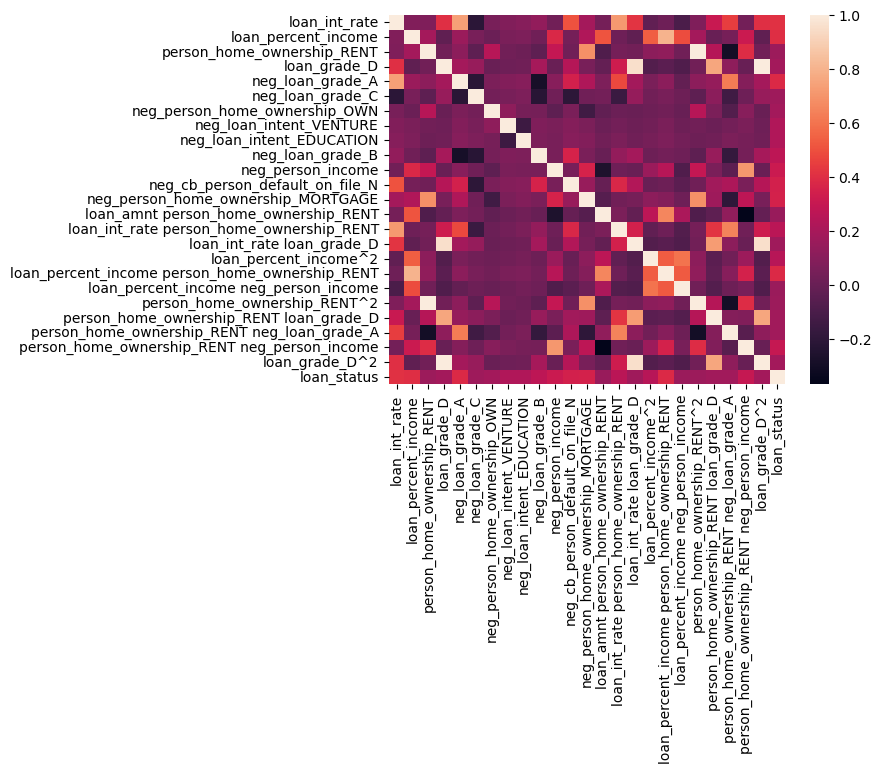

In [159]:
sns.heatmap(clean_df.corr())

In [163]:
from sklearn.model_selection import train_test_split
X,y = clean_df.loc[:,~clean_df.columns.isin(['loan_status'])] , clean_df.loc[:,clean_df.columns.isin(['loan_status'])]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=1000, max_depth=15, learning_rate=0.05, objective='binary:logistic', random_state=10)
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, ...)

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      4452
         1.0       0.95      0.93      0.94      4749

    accuracy                           0.94      9201
   macro avg       0.94      0.94      0.94      9201
weighted avg       0.94      0.94      0.94      9201



<AxesSubplot:>

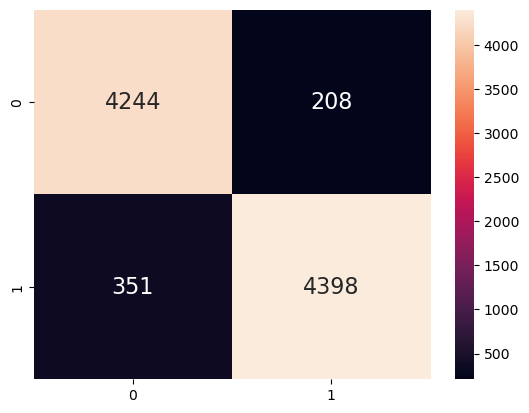

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
predictions = xgboost.predict(X_test)
print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, annot_kws={"size": 16},fmt='g')

In [211]:
y_proba_XGB= xgboost.predict_proba(X_test)

In [212]:
y_proba_XGB[:, 1]

array([0.99545896, 0.999668  , 0.999951  , ..., 0.9999956 , 0.12042897,
       0.0312554 ], dtype=float32)

model 1 AUC score: 0.9812694288313785


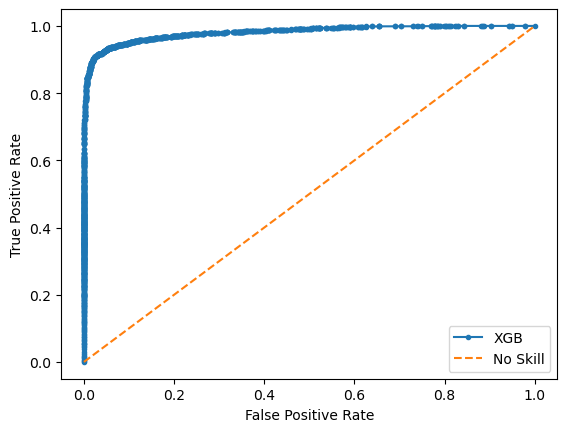

In [216]:
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    ## generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    
    plt.plot(fpr, tpr,marker='.',label = 'XGB')
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.ylabel('True Positive Rate')
# keep probabilities for the positive outcome only
plot_roc_curve(y_test, y_proba_XGB[:,1])
print(f'model 1 AUC score: {roc_auc_score(y_test, y_proba_XGB[:,1])}')

In [238]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
prediction_dt = dt.predict(X_test)
print(classification_report(y_test, prediction_dt))
y_proba_DT= dt.predict_proba(X_test)
y_proba_DT[:, 1]

              precision    recall  f1-score   support

         0.0       0.91      0.90      0.91      4452
         1.0       0.91      0.92      0.91      4749

    accuracy                           0.91      9201
   macro avg       0.91      0.91      0.91      9201
weighted avg       0.91      0.91      0.91      9201



array([1., 1., 1., ..., 1., 0., 0.])

In [240]:
from sklearn.ensemble import RandomForestClassifier
random_forest_credit = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest_credit.fit(X_train, y_train)
prediction_random = random_forest_credit.predict(X_test)
print(classification_report(y_test, prediction_random))
y_proba_RF= random_forest_credit.predict_proba(X_test)
y_proba_RF[:, 1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


              precision    recall  f1-score   support

         0.0       0.92      0.96      0.93      4452
         1.0       0.96      0.92      0.94      4749

    accuracy                           0.94      9201
   macro avg       0.94      0.94      0.94      9201
weighted avg       0.94      0.94      0.94      9201



array([0.975, 0.975, 1.   , ..., 1.   , 0.125, 0.025])

In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn_credit = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_credit.fit(X_train, y_train)
prediction_knn = knn_credit.predict(X_test)
print(classification_report(y_test, prediction_knn))
y_proba_KNN= knn_credit.predict_proba(X_test)
y_proba_KNN[:, 1]

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      4452
         1.0       0.94      0.90      0.92      4749

    accuracy                           0.91      9201
   macro avg       0.92      0.92      0.91      9201
weighted avg       0.92      0.91      0.91      9201



array([1. , 1. , 1. , ..., 1. , 0.2, 0.2])

In [253]:
from sklearn.svm import SVC
svm_credit = SVC(kernel='rbf', random_state=1, C = 2.0,probability=True) # 2 -> 4
svm_credit.fit(X_train, y_train)
prediction_svm = svm_credit.predict(X_test)
print(classification_report(y_test, prediction_svm))
y_proba_SVM= svm_credit.predict_proba(X_test)
y_proba_SVM[:, 1]

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      4452
         1.0       0.96      0.88      0.92      4749

    accuracy                           0.92      9201
   macro avg       0.92      0.92      0.92      9201
weighted avg       0.92      0.92      0.92      9201



array([0.93882321, 0.95797113, 0.99999633, ..., 1.        , 0.11990525,
       0.11622595])

In [262]:
X_train.shape

(27603, 24)

In [266]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 
ann = Sequential()
ann.add(Dense(500, activation='relu', input_dim=24))
ann.add(Dense(100, activation='relu'))
ann.add(Dense(50, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))

# Compile the ann
ann.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=100)
prediction_ANN= ann.predict(X_test)
y_proba_ANN= ann.predict_proba(X_test)
y_proba_ANN[:, 1]

Epoch 1/100
863/863 [==============================] - 4s 3ms/step - loss: 0.2480 - accuracy: 0.9045
Epoch 2/100
863/863 [==============================] - 3s 3ms/step - loss: 0.2150 - accuracy: 0.9196
Epoch 3/100
863/863 [==============================] - 3s 3ms/step - loss: 0.2093 - accuracy: 0.9213
Epoch 4/100
863/863 [==============================] - 3s 3ms/step - loss: 0.2057 - accuracy: 0.9235
Epoch 5/100
863/863 [==============================] - 3s 3ms/step - loss: 0.2021 - accuracy: 0.9249
Epoch 6/100
863/863 [==============================] - 3s 3ms/step - loss: 0.1998 - accuracy: 0.9248
Epoch 7/100
863/863 [==============================] - 3s 3ms/step - loss: 0.1974 - accuracy: 0.9261
Epoch 8/100
863/863 [==============================] - 3s 3ms/step - loss: 0.1965 - accuracy: 0.9253
Epoch 9/100
863/863 [==============================] - 3s 3ms/step - loss: 0.1959 - accuracy: 0.9266
Epoch 10/100
863/863 [==============================] - 3s 3ms/step - loss: 0.1946 - accura

NameError: name 'ann_credit' is not defined

In [287]:
prediction_ANN= ann.predict(X_test)
prediction_ANN
#print(classification_report(y_test, prediction_ANN))
#y_proba_ANN= ann.predict_proba(X_test)
#y_proba_ANN[:, 1]
y_proba_ANN = prediction_ANN
y_pred_ANN = [1 if i > 0.72 else 0 for i in prediction_ANN ]
print(classification_report(y_test, y_pred_ANN))

288/288 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      4452
         1.0       0.95      0.88      0.91      4749

    accuracy                           0.92      9201
   macro avg       0.92      0.92      0.92      9201
weighted avg       0.92      0.92      0.91      9201



XGB AUC score: 0.9812694288313785
 RF AUC score: 0.9735848772815838
ANN AUC score: 0.9571089539444347
SVM AUC score: 0.9568663152615287
KNN AUC score: 0.953116057723979
 DT AUC score: 0.9112850541949816
Base AUC score: 0.5


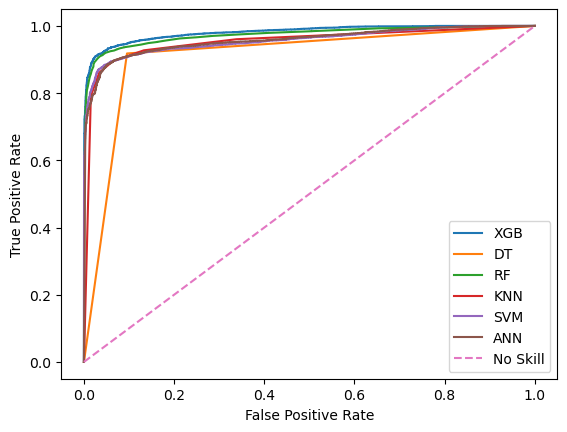

In [278]:
ns_probs = [0 for _ in range(len(y_test))]
    
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_proba_XGB[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_proba_DT[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_proba_RF[:,1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_proba_KNN[:,1])
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_proba_SVM[:,1])
fpr_ann, tpr_ann, thresholds_ann = roc_curve(y_test, y_proba_ANN)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

plt.plot(fpr_xgb, tpr_xgb,label = 'XGB')
plt.plot(fpr_dt, tpr_dt,label = 'DT')
plt.plot(fpr_rf, tpr_rf,label = 'RF')
plt.plot(fpr_knn, tpr_knn,label = 'KNN')
plt.plot(fpr_svm, tpr_svm,label = 'SVM')
plt.plot(fpr_ann, tpr_ann,label = 'ANN')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')


plt.xlabel('False Positive Rate')
plt.legend()
plt.ylabel('True Positive Rate')
print(f'XGB AUC score: {roc_auc_score(y_test, y_proba_XGB[:,1])}')
print(f' RF AUC score: {roc_auc_score(y_test, y_proba_RF[:,1])}')
print(f'ANN AUC score: {roc_auc_score(y_test, y_proba_ANN)}')
print(f'SVM AUC score: {roc_auc_score(y_test, y_proba_SVM[:,1])}')
print(f'KNN AUC score: {roc_auc_score(y_test, y_proba_KNN[:,1])}')
print(f' DT AUC score: {roc_auc_score(y_test, y_proba_DT[:,1])}')

print(f'Base AUC score: {roc_auc_score(y_test, ns_probs)}')